In [1]:
import cv2
from matplotlib import pyplot as plt

In [2]:
def compute_disparity_map(img_left, img_right):
    # 创建 StereoSGBM 对象
    stereo = cv2.StereoSGBM_create(minDisparity=0, numDisparities=16, blockSize=5)

    # 计算视差图
    disparity = stereo.compute(img_left, img_right)

    # 视差图归一化处理
    disparity_normalized = cv2.normalize(disparity, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    return disparity_normalized

In [3]:
def display_disparity_map(img_left, img_right, disparity_map):
    # 创建 Matplotlib 子图
    fig, axs = plt.subplots(1, 3, figsize=(12, 6))

    # 显示左右视图图像
    axs[0].imshow(img_left, cmap='gray')
    axs[0].set_title('Left Image')
    axs[1].imshow(img_right, cmap='gray')
    axs[1].set_title('Right Image')

    # 显示视差图
    axs[2].imshow(disparity_map, cmap='gray')
    axs[2].set_title('Disparity Map')
    fig.colorbar(axs[2].imshow(disparity_map, cmap='gray'), ax=axs[2])

    plt.show()

In [7]:
def main():
    # 读取左右视图图像
    img_left = cv2.imread('image/left.jpg', 0)  # 以灰度模式读取图像
    img_right = cv2.imread('image/right.jpg', 0)
#     print(img_left.shape)
    # 计算视差图
    disparity_map = compute_disparity_map(img_left, img_right)

    # 显示原始图像和视差图像
    display_disparity_map(img_left, img_right, disparity_map)

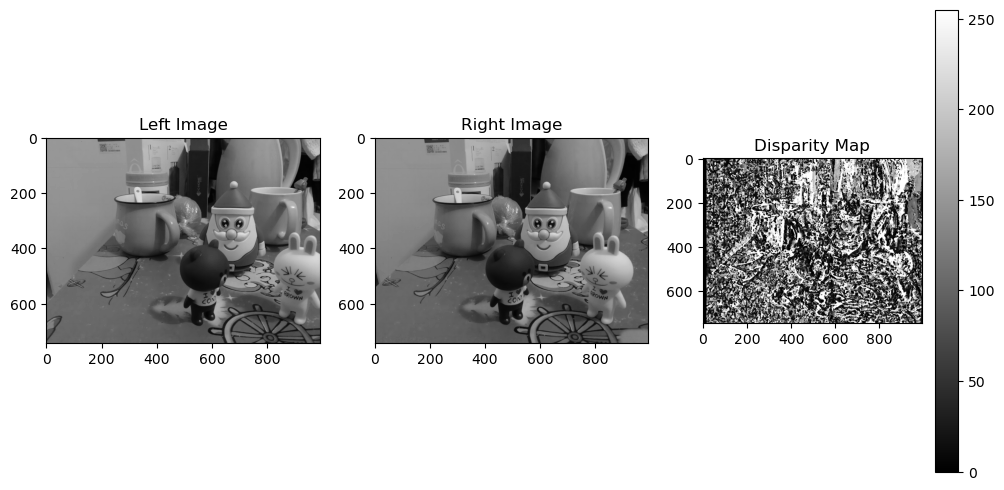

In [9]:
if __name__ == "__main__":
    main()